In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('cac_merged_20231106191438_004.csv')

In [3]:
data.drop(columns="Unnamed: 0", inplace=True)

In [4]:
data.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,num_cars_owned,yearly_income,num_children_at_home,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Snack Foods,Snack Foods,Food,6.40,2.1120,2,Go For It,USA,M,F,3,Bachelors Degree,Golden,Management,Y,3,$50K - $70K,0,Nationeel,3.20,18.9,16.8,1,0,33,Small Grocery,Bellingham,WA,28206.0,22271.0,3561.0,2374.0,1,0,0,0,0,Radio,228.19
1,Hygiene,Health and Hygiene,Non-Consumable,3.20,1.5680,2,Go For It,USA,M,F,3,Bachelors Degree,Golden,Management,Y,3,$50K - $70K,0,Hilltop,1.60,19.8,17.7,1,0,29,Small Grocery,Bellingham,WA,28206.0,22271.0,3561.0,2374.0,1,0,0,0,0,Radio,228.19
2,Carbonated Beverages,Beverages,Drink,4.68,1.8252,2,Go For It,USA,M,F,3,Bachelors Degree,Golden,Management,Y,3,$50K - $70K,0,Fabulous,2.34,17.7,14.7,0,0,13,Small Grocery,Bellingham,WA,28206.0,22271.0,3561.0,2374.0,1,0,0,0,0,Radio,228.19
3,Decongestants,Health and Hygiene,Non-Consumable,1.08,0.3240,2,Go For It,USA,M,F,3,Bachelors Degree,Golden,Management,Y,3,$50K - $70K,0,Bird Call,0.54,17.3,16.2,1,0,15,Small Grocery,Bellingham,WA,28206.0,22271.0,3561.0,2374.0,1,0,0,0,0,Radio,228.19
4,Bread,Baked Goods,Food,0.93,0.3999,1,Go For It,USA,M,F,3,Bachelors Degree,Golden,Management,Y,3,$50K - $70K,0,Great,0.93,13.6,11.6,1,0,30,Small Grocery,Bellingham,WA,28206.0,22271.0,3561.0,2374.0,1,0,0,0,0,Radio,228.19


In [5]:
print('Number of rows = {} and features = {}'.format(data.shape[0],data.shape[1]))

Number of rows = 70751 and features = 39


### Check for missing values

In [6]:
data.isna().sum()

food_category               0
food_department             0
food_family                 0
store_sales(in millions)    0
store_cost(in millions)     0
unit_sales(in millions)     0
promotion_name              0
sales_country               0
marital_status              0
gender                      0
total_children              0
education                   0
member_card                 0
occupation                  0
houseowner                  0
num_cars_owned              0
yearly_income               0
num_children_at_home        0
brand_name                  0
SRP                         0
gross_weight                0
net_weight                  0
recyclable_package          0
low_fat                     0
units_per_case              0
store_type                  0
store_city                  0
store_state                 0
store_sqft                  0
grocery_sqft                0
frozen_sqft                 0
meat_sqft                   0
coffee_bar                  0
video_stor

### Check for duplicate records

In [7]:
data.duplicated().value_counts()

False    70751
dtype: int64

### List catergorical and numerical features

In [8]:
categorical_features = data.select_dtypes(exclude=["number"]).columns.tolist()
categorical_features

['food_category',
 'food_department',
 'food_family',
 'promotion_name',
 'sales_country',
 'marital_status',
 'gender',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'yearly_income',
 'brand_name',
 'store_type',
 'store_city',
 'store_state',
 'media_type']

In [9]:
numerical_features = data.select_dtypes(include=["number"]).columns.tolist()
numerical_features

['store_sales(in millions)',
 'store_cost(in millions)',
 'unit_sales(in millions)',
 'total_children',
 'num_cars_owned',
 'num_children_at_home',
 'SRP',
 'gross_weight',
 'net_weight',
 'recyclable_package',
 'low_fat',
 'units_per_case',
 'store_sqft',
 'grocery_sqft',
 'frozen_sqft',
 'meat_sqft',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist',
 'cost']

In [10]:
pure_numeric = ['store_sales(in millions)',
 'store_cost(in millions)',
 'SRP',
 'gross_weight',
 'net_weight',
 'units_per_case',
 'store_sqft',
 'grocery_sqft',
 'frozen_sqft',
 'meat_sqft',
 'cost']

for col in pure_numeric:
  print('-'*30)
  print(col)
  print('-'*30)
  print(len(data[col].value_counts()))
  print()

------------------------------
store_sales(in millions)
------------------------------
1039

------------------------------
store_cost(in millions)
------------------------------
10277

------------------------------
SRP
------------------------------
315

------------------------------
gross_weight
------------------------------
376

------------------------------
net_weight
------------------------------
332

------------------------------
units_per_case
------------------------------
36

------------------------------
store_sqft
------------------------------
21

------------------------------
grocery_sqft
------------------------------
21

------------------------------
frozen_sqft
------------------------------
21

------------------------------
meat_sqft
------------------------------
21

------------------------------
cost
------------------------------
399



In [11]:
# numerical valued features which might be actually categorical features
cat_num_features = [
 'unit_sales(in millions)',
 'total_children',
 'num_cars_owned',
 'num_children_at_home',
 'recyclable_package',
 'low_fat',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist',]
data[cat_num_features]

,unit_sales(in millions),total_children,num_cars_owned,num_children_at_home,recyclable_package,low_fat,coffee_bar,video_store,salad_bar,prepared_food,florist
0,2,3,3,0,1,0,1,0,0,0,0
1,2,3,3,0,1,0,1,0,0,0,0
2,2,3,3,0,0,0,1,0,0,0,0
3,2,3,3,0,1,0,1,0,0,0,0
4,1,3,3,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
70746,3,4,3,0,1,1,1,0,0,0,0
70747,2,4,3,0,1,1,1,0,0,0,0
70748,2,0,3,0,0,0,1,0,0,0,0
70749,2,0,3,0,0,0,1,0,0,0,0


In [12]:
for col in cat_num_features:
  print('-'*30)
  print(col)
  print('-'*30)
  print(data[col].value_counts())

------------------------------
unit_sales(in millions)
------------------------------
3    31963
4    19386
2    15779
5     2457
1     1139
6       27
Name: unit_sales(in millions), dtype: int64
------------------------------
total_children
------------------------------
4    14528
2    14459
3    14123
1    13695
5     7361
0     6585
Name: total_children, dtype: int64
------------------------------
num_cars_owned
------------------------------
2    21554
3    19769
1    15954
4     9409
0     4065
Name: num_cars_owned, dtype: int64
------------------------------
num_children_at_home
------------------------------
0    44143
1    10238
2     6812
3     5071
4     2975
5     1512
Name: num_children_at_home, dtype: int64
------------------------------
recyclable_package
------------------------------
1    39528
0    31223
Name: recyclable_package, dtype: int64
------------------------------
low_fat
------------------------------
0    45925
1    24826
Name: low_fat, dtype: int64
-------

In [13]:
for col in categorical_features:
  print('-'*30)
  print(col)
  print('-'*30)
  print(data[col].value_counts())

------------------------------
food_category
------------------------------
Vegetables              8732
Snack Foods             8082
Dairy                   4532
Meat                    3628
Fruit                   3626
Jams and Jellies        2997
Baking Goods            2296
Breakfast Foods         2292
Bread                   2081
Canned Soup             1993
Beer and Wine           1876
Paper Products          1816
Bathroom Products       1815
Candy                   1808
Electrical              1789
Frozen Desserts         1685
Specialty               1356
Starchy Foods           1302
Kitchen Products        1149
Magazines               1139
Eggs                    1101
Hot Beverages           1060
Pizza                    971
Pain Relievers           960
Hygiene                  956
Carbonated Beverages     902
Pure Juice Beverages     886
Cleaning Supplies        864
Drinks                   696
Side Dishes              694
Frozen Entrees           687
Plastic Products         

In [14]:
len(categorical_features)+len(numerical_features)

39

In [15]:
X = data.drop(columns='cost')
y = data['cost']
y

0        228.19
1        228.19
2        228.19
3        228.19
4        228.19
          ...  
70746    728.89
70747    728.89
70748    728.89
70749    728.89
70750    728.89
Name: cost, Length: 70751, dtype: float64

<Axes: xlabel='cost', ylabel='Density'>

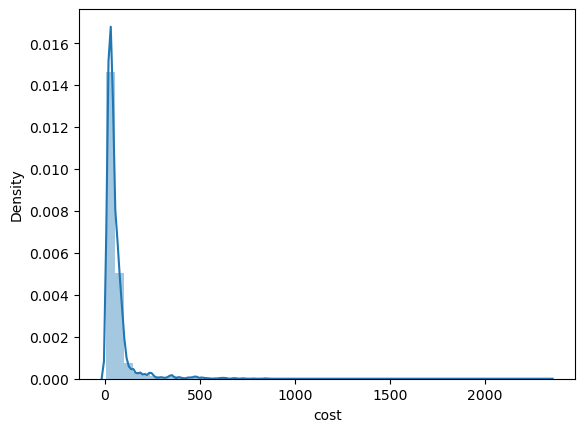

In [16]:
sns.distplot(data['cost'])

### The Top ten food_categories sold and food department

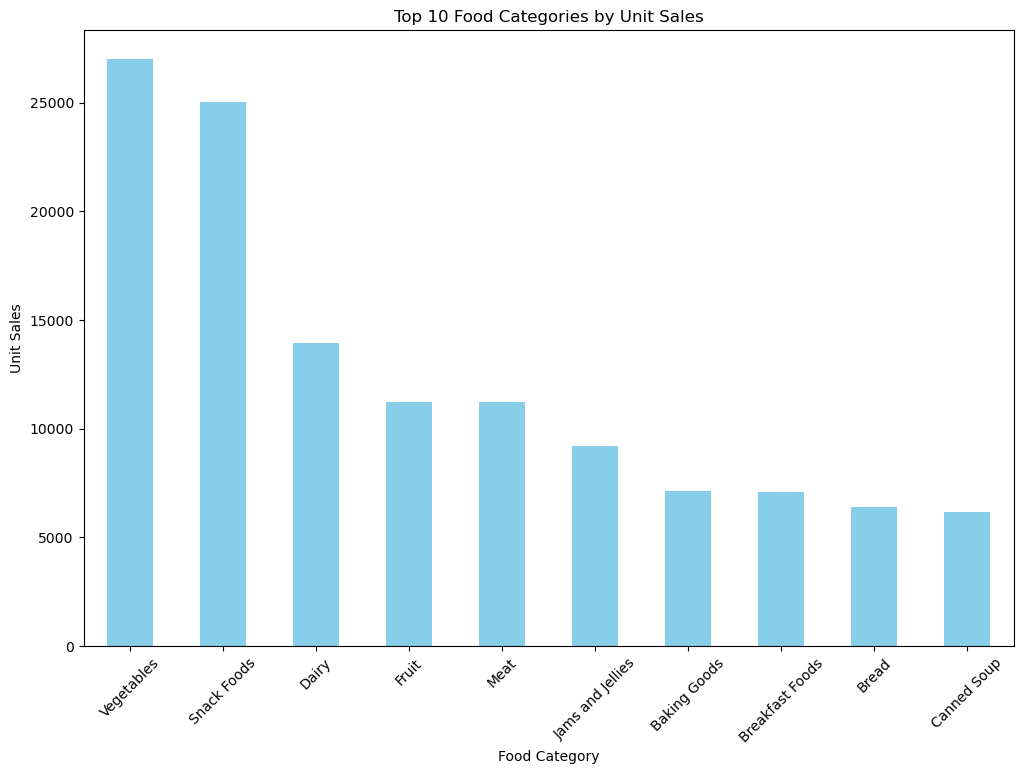

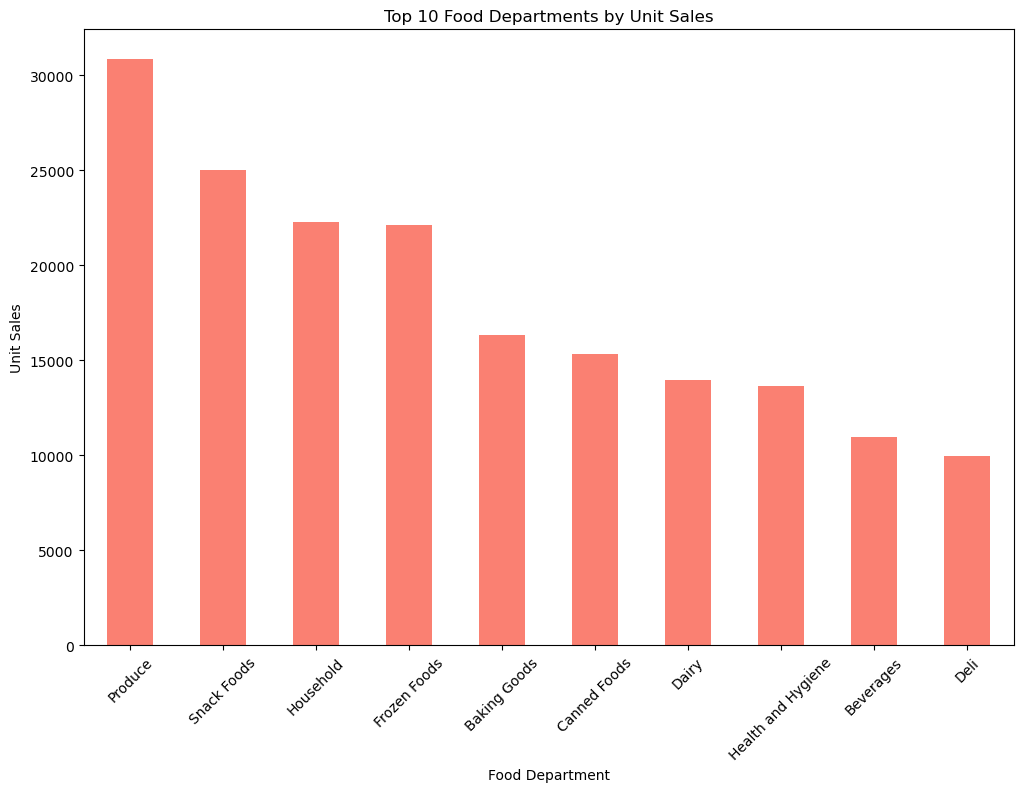

In [17]:
unit_sales_count = data.groupby('food_category')['unit_sales(in millions)'].sum().sort_values(ascending=False)
top_10_food_categories = unit_sales_count.head(10)
plt.figure(figsize=(12, 8))
top_10_food_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Food Categories by Unit Sales')
plt.xlabel('Food Category')
plt.ylabel('Unit Sales')
plt.xticks(rotation=45)
plt.show()

department_sales_count = data.groupby('food_department')['unit_sales(in millions)'].sum().sort_values(ascending=False)
top_10_departments = department_sales_count.head(10)
plt.figure(figsize=(12, 8))
top_10_departments.plot(kind='bar', color='salmon')
plt.title('Top 10 Food Departments by Unit Sales')
plt.xlabel('Food Department')
plt.ylabel('Unit Sales')
plt.xticks(rotation=45)
plt.show()


### The top three food categories in each store type.

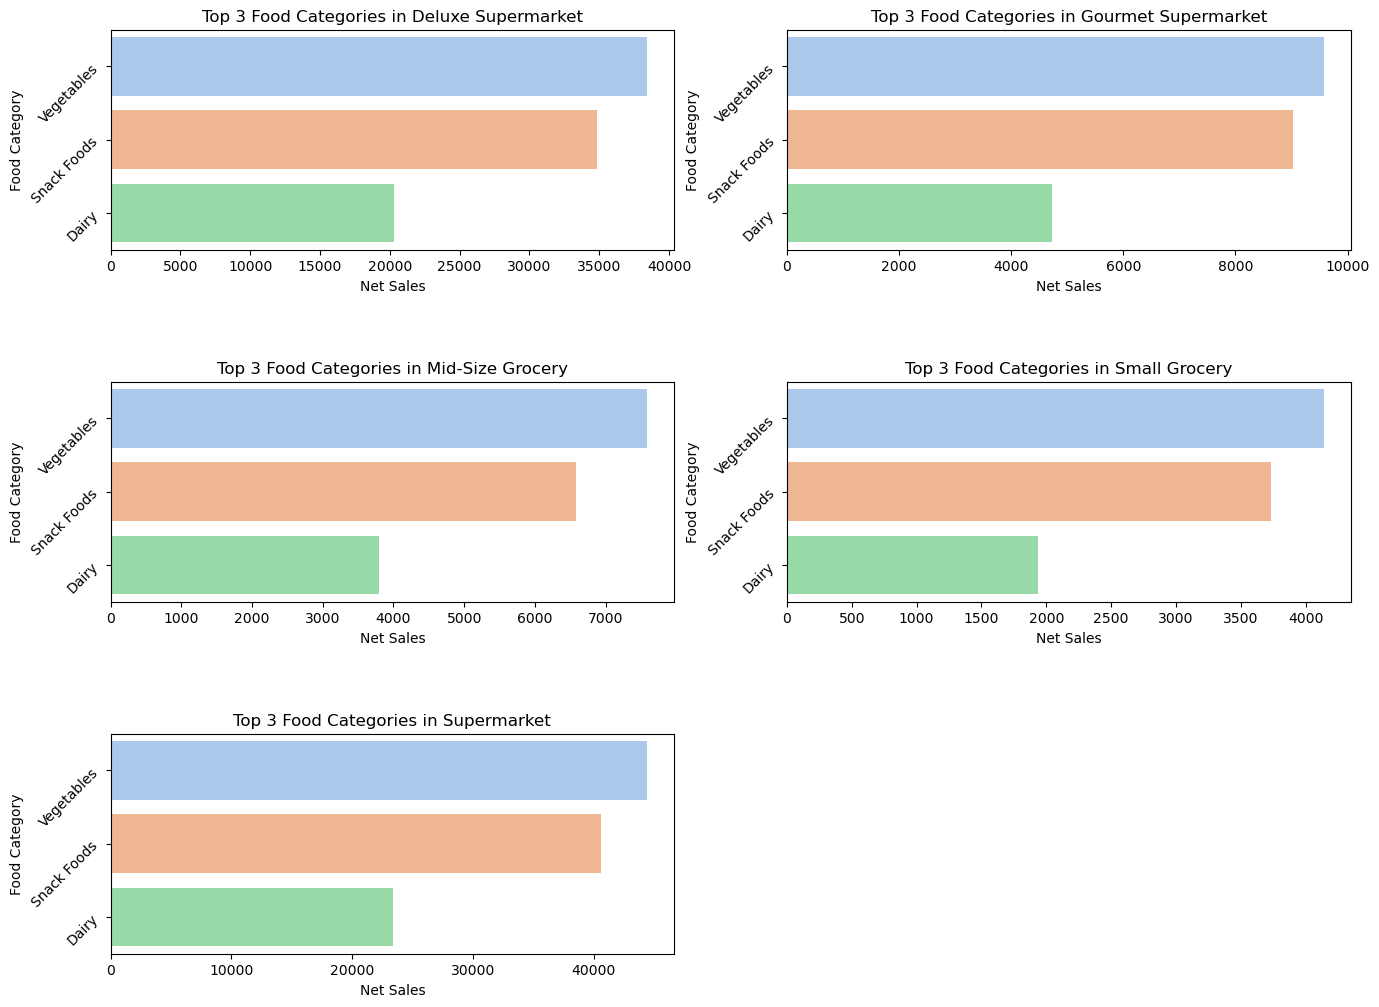

In [18]:
net_sales_by_category_store = data.groupby(['store_type', 'food_category'])['net_weight'].sum().reset_index()
top_3_categories_by_store = net_sales_by_category_store.groupby('store_type').apply(lambda x: x.nlargest(3, 'net_weight')).reset_index(drop=True)
num_unique_store_types = top_3_categories_by_store['store_type'].nunique()
num_cols = 2
num_rows = (num_unique_store_types + num_cols - 1) // num_cols 
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 4 * num_rows))
fig.subplots_adjust(hspace=0.6)

for i, store_type in enumerate(top_3_categories_by_store['store_type'].unique()):
    subset = top_3_categories_by_store[top_3_categories_by_store['store_type'] == store_type]
    
    row = i // num_cols
    col = i % num_cols
    
    sns.barplot(x='net_weight', y='food_category', data=subset, ax=axes[row, col], palette='pastel')
    axes[row, col].set_title(f'Top 3 Food Categories in {store_type}')
    axes[row, col].set_xlabel('Net Sales')
    axes[row, col].set_ylabel('Food Category')
    
    axes[row, col].set_yticklabels(axes[row, col].get_yticklabels(), rotation=45)

for i in range(num_unique_store_types, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.show()


In all the store types the highest food category is "Vegetables".

### Sales Distribution by Country

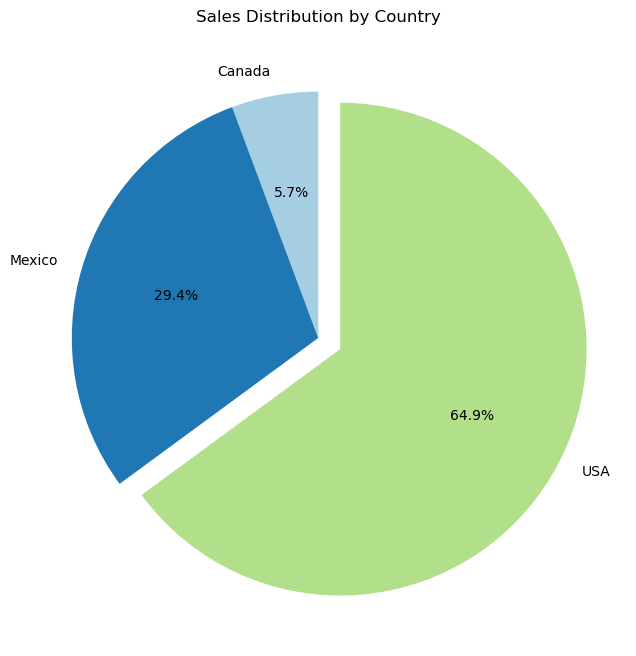

In [19]:
sales_by_country = data.groupby('sales_country')['store_sales(in millions)'].sum()
highest_sales_country = sales_by_country.idxmax()
explode_values = [0.1 if country == highest_sales_country else 0 for country in sales_by_country.index]

plt.figure(figsize=(10, 8))
plt.pie(sales_by_country, labels=sales_by_country.index, autopct='%1.1f%%', startangle=90, explode=explode_values, colors=plt.cm.Paired.colors)
plt.title('Sales Distribution by Country')
plt.show()


From the above pie Chart we can see that USA has the highest sales than other countries as it has more number of stores.

### Sales Analysis by Country and Food Department

In [20]:
data_USA=pd.DataFrame(data.loc[data['sales_country'] =='USA'])
data_Mexico=pd.DataFrame(data.loc[data['sales_country'] =='Mexico']) 
data_Canada=pd.DataFrame(data.loc[data['sales_country'] =='Canada']) 

In [21]:
data_USA_list=data_USA.groupby("food_department")[["cost"]].mean().sort_values(by=['cost'],ascending=[False]).reset_index()
data_USA_list.rename(columns = {'food_department':'Items_USA','cost':'Sales_of_USA'}, inplace = True)
data_USA_list.index = data_USA_list.index + 1
data_USA_list

,Items_USA,Sales_of_USA
1,Carousel,67.618976
2,Meat,65.853624
3,Starchy Foods,64.093803
4,Snack Foods,63.667879
5,Produce,63.298504
6,Seafood,63.096545
7,Deli,62.858626
8,Baked Goods,62.835646
9,Canned Foods,62.753383
10,Baking Goods,62.490122


In [22]:
data_Mexico_list=data_Mexico.groupby("food_department")[["cost"]].mean().sort_values(by=['cost'],ascending=[False]).reset_index()
data_Mexico_list.rename(columns = {'food_department':'Items','cost':'Sales_of_Mexico'}, inplace = True)
data_Mexico_list.index = data_Mexico_list.index + 1
data_Mexico_list

,Items,Sales_of_Mexico
1,Snacks,54.048675
2,Seafood,52.414803
3,Baking Goods,51.794370
4,Starchy Foods,51.412954
5,Eggs,51.355213
6,Dairy,51.333758
7,Frozen Foods,50.499186
8,Alcoholic Beverages,49.958705
9,Deli,49.887874
10,Breakfast Foods,49.853511


In [23]:
data_Canada_list=data_Canada.groupby("food_department")[["cost"]].mean().sort_values(by=['cost'],ascending=[False]).reset_index()
data_Canada_list.rename(columns = {'food_department':'Items','cost':'Sales_of_Canada'}, inplace = True)
data_Canada_list.index = data_Canada_list.index + 1
data_Canada_list

,Items,Sales_of_Canada
1,Canned Products,69.366786
2,Carousel,64.296667
3,Snacks,60.763981
4,Eggs,57.827931
5,Meat,57.047727
6,Snack Foods,56.871612
7,Deli,56.469148
8,Canned Foods,56.243071
9,Alcoholic Beverages,56.013854
10,Baked Goods,55.629091


In [24]:
data_country_sales=pd.concat([data_USA_list,data_Mexico_list,data_Canada_list],axis=1)
data_country_sales

,Items_USA,Sales_of_USA,Items,Sales_of_Mexico,Items,Sales_of_Canada
1,Carousel,67.618976,Snacks,54.048675,Canned Products,69.366786
2,Meat,65.853624,Seafood,52.414803,Carousel,64.296667
3,Starchy Foods,64.093803,Baking Goods,51.794370,Snacks,60.763981
4,Snack Foods,63.667879,Starchy Foods,51.412954,Eggs,57.827931
5,Produce,63.298504,Eggs,51.355213,Meat,57.047727
6,Seafood,63.096545,Dairy,51.333758,Snack Foods,56.871612
7,Deli,62.858626,Frozen Foods,50.499186,Deli,56.469148
8,Baked Goods,62.835646,Alcoholic Beverages,49.958705,Canned Foods,56.243071
9,Canned Foods,62.753383,Deli,49.887874,Alcoholic Beverages,56.013854
10,Baking Goods,62.490122,Breakfast Foods,49.853511,Baked Goods,55.629091


This is a sales analysis, focusing on country and food department metrics. Average sales for diverse food departments are computed and ranked in descending order within each country. The results are then consolidated into a single dataframe, providing a unified perspective on sales performance across countries. This analysis facilitates the identification of the most successful food departments in each country, enabling straightforward comparisons of sales metrics.

### The top 10 promotions based on sales

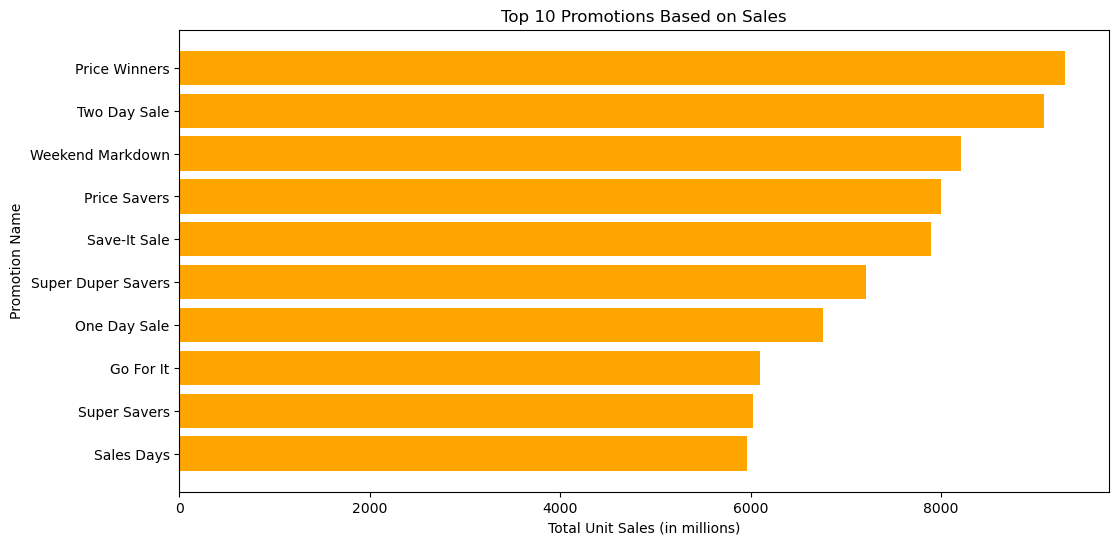

In [25]:
promotion_sales = data.groupby('promotion_name')['unit_sales(in millions)'].sum().reset_index()
top_10_promotions = promotion_sales.sort_values(by='unit_sales(in millions)', ascending=False).head(10)
top_10_promotions = top_10_promotions[::-1]
plt.figure(figsize=(12, 6))
plt.barh(top_10_promotions['promotion_name'], top_10_promotions['unit_sales(in millions)'], color='orange')
plt.xlabel('Total Unit Sales (in millions)')
plt.ylabel('Promotion Name')
plt.title('Top 10 Promotions Based on Sales')
plt.show()

### Top 10 Promotion Sales in Different Store Types

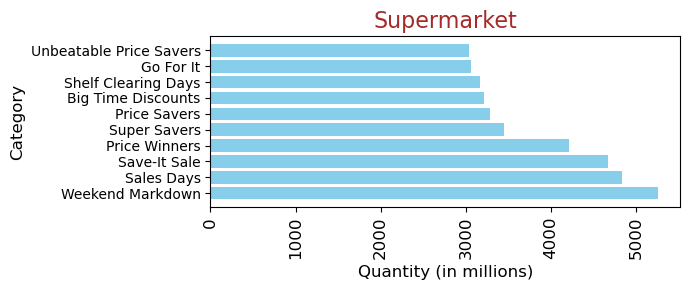

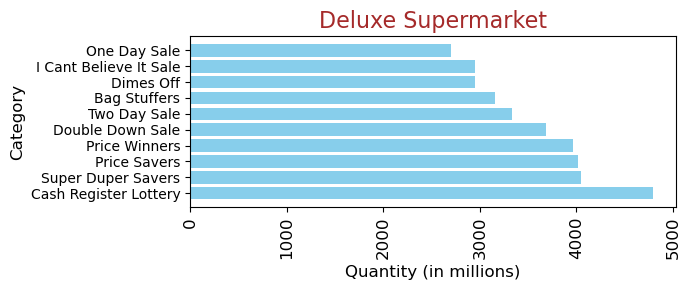

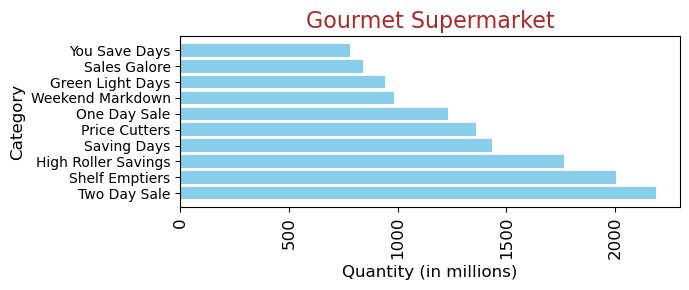

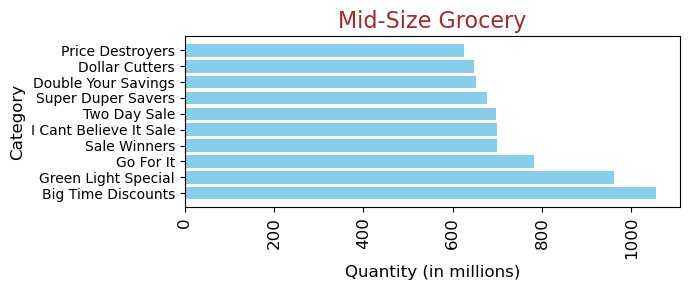

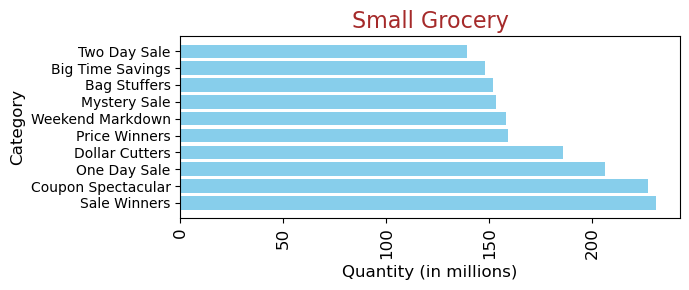

In [26]:
supermarket_store = data[data['store_type'] == "Supermarket"]
deluxe_supermarket_store = data[data['store_type'] == "Deluxe Supermarket"]
gourmet_supermarket_store = data[data['store_type'] == "Gourmet Supermarket"]
mid_size_grocery_store = data[data['store_type'] == "Mid-Size Grocery"]
small_grocery_store = data[data['store_type'] == "Small Grocery"]

stores = ["Supermarket", "Deluxe Supermarket", "Gourmet Supermarket", "Mid-Size Grocery", "Small Grocery"]

for i, store in enumerate([supermarket_store, deluxe_supermarket_store, gourmet_supermarket_store, mid_size_grocery_store, small_grocery_store]):
    plt.figure(figsize=(7, 3)) 
    
    data_category_quantity = store.groupby('promotion_name')['unit_sales(in millions)'].sum().reset_index()
    data_category_quantity = data_category_quantity.sort_values(by='unit_sales(in millions)', ascending=False)

    plt.barh(data_category_quantity[:10]['promotion_name'], data_category_quantity[:10]['unit_sales(in millions)'], color='skyblue')
    plt.xticks(rotation='vertical', size=12)  
    plt.yticks(size=10)  
    plt.xlabel('Quantity (in millions)', size=12)  
    plt.ylabel('Category', size=12)  
    plt.title(stores[i], fontsize=16, color='brown')  

    plt.tight_layout()  
    plt.show()


In Supermarkets: the two best promotions are Sales Days and Weekend Markdown.
In Deluxe Supermarkets: the two best promotions are Super Duper Saver and Cash Register Lottery.
In Gourmet Supermarkets: the two best promotions are Shelf Emptiers and Two Day Sale
In Mid-Size Grocery: the two best promotions are Green Light Special and Big Time Discounts
In Small Grocery: the two best promotions are Coupon Spectacular and Sale Winners.

### Total Unit Sales for Each Member Card Type

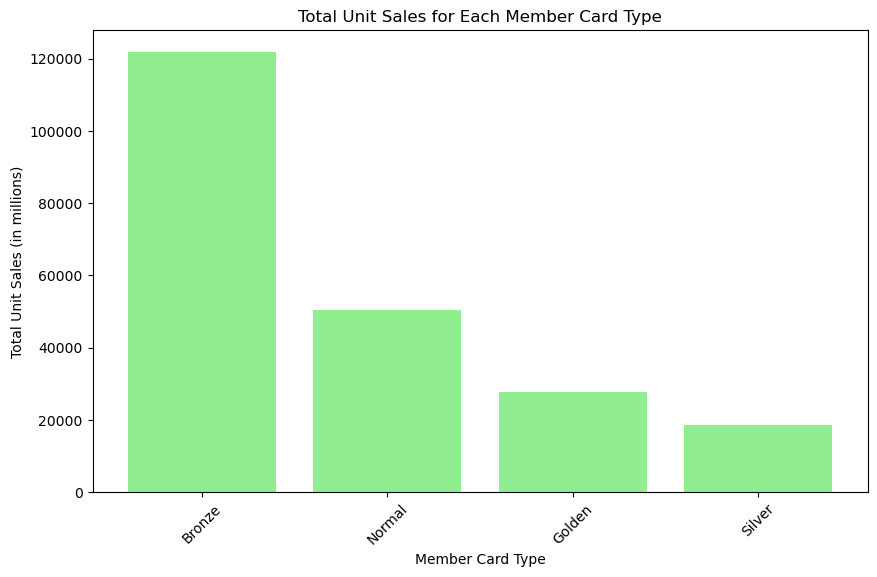

In [27]:
member_card_sales = data.groupby('member_card')['unit_sales(in millions)'].sum().reset_index()
sorted_member_cards = member_card_sales.sort_values(by='unit_sales(in millions)', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(sorted_member_cards['member_card'], sorted_member_cards['unit_sales(in millions)'], color='lightgreen')
plt.xlabel('Member Card Type')
plt.ylabel('Total Unit Sales (in millions)')
plt.title('Total Unit Sales for Each Member Card Type')
plt.xticks(rotation=45)  
plt.show()

### Proportion of Unit Sales for Each Yearly Income Category

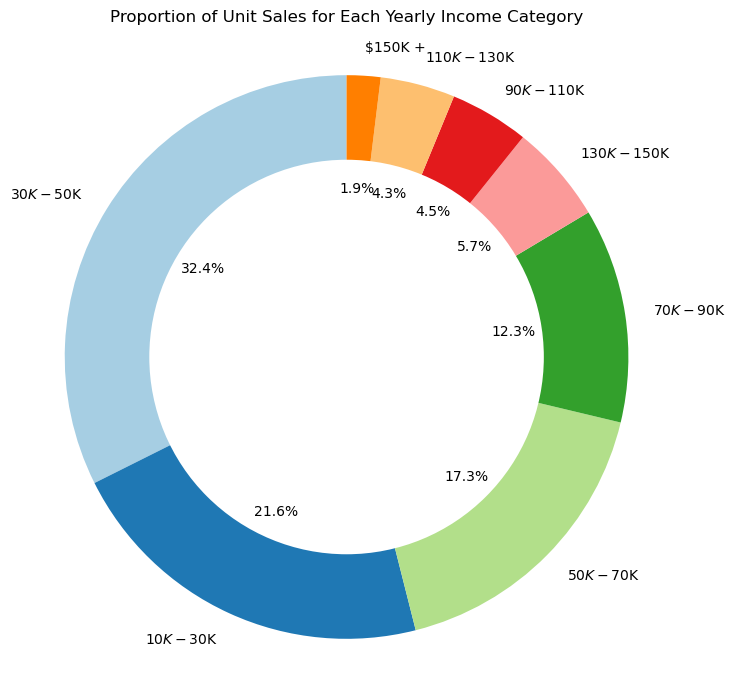

In [29]:
income_sales = data.groupby('yearly_income')['unit_sales(in millions)'].sum().reset_index()
total_sales = income_sales['unit_sales(in millions)'].sum()
income_sales['proportion'] = income_sales['unit_sales(in millions)'] / total_sales

sorted_income_categories = income_sales.sort_values(by='unit_sales(in millions)', ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(sorted_income_categories['proportion'], labels=sorted_income_categories['yearly_income'],
        autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Proportion of Unit Sales for Each Yearly Income Category', pad=20)
plt.show()

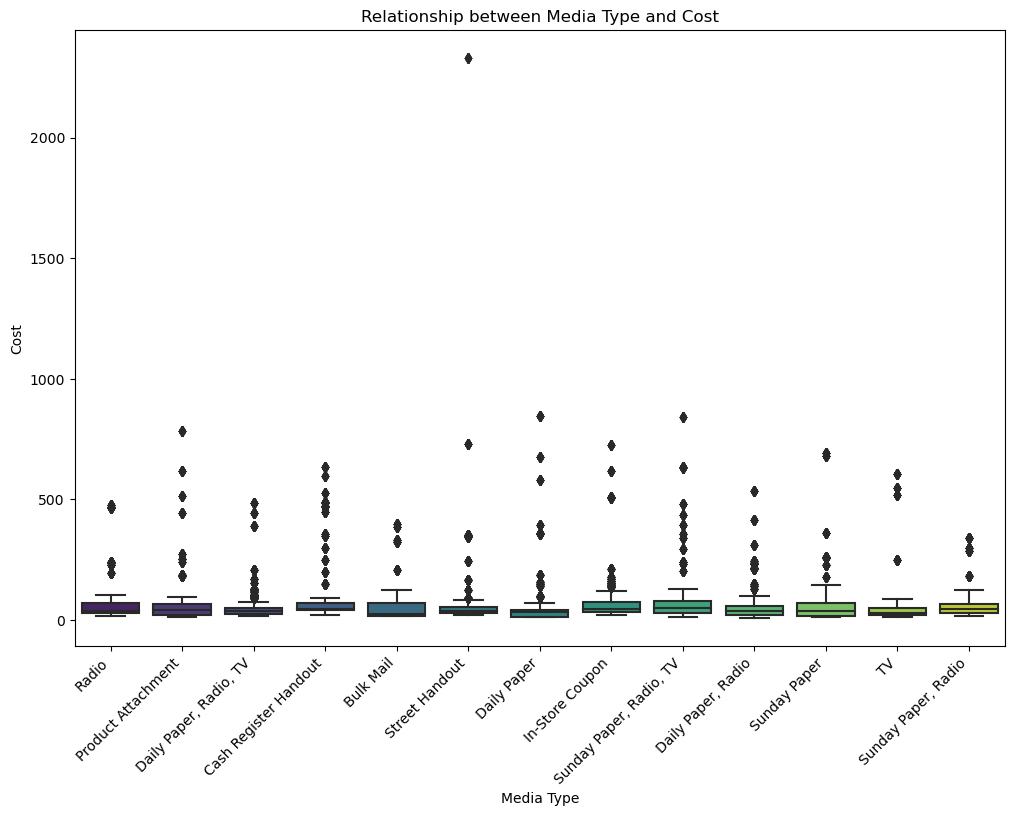

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='media_type', y='cost', data=data, palette='viridis')
plt.xticks(rotation=45, ha='right')  
plt.xlabel('Media Type')
plt.ylabel('Cost')
plt.title('Relationship between Media Type and Cost')
plt.show()


### Relationship between Media Type 

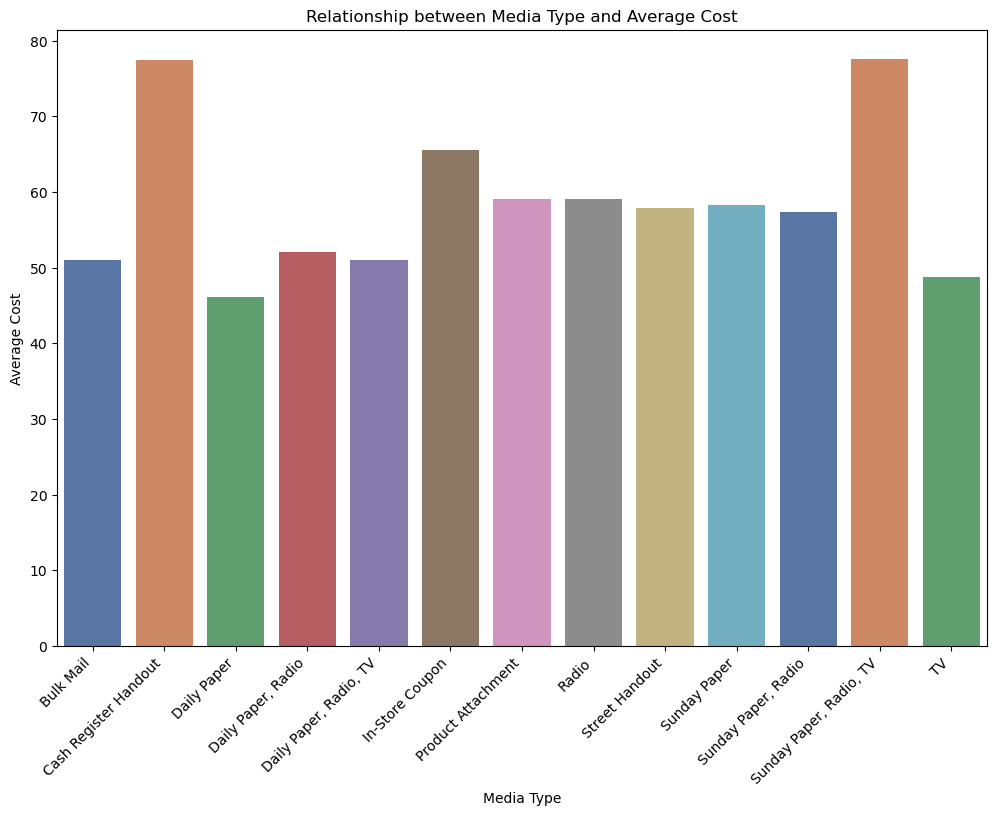

In [47]:
media_type_relation = data.groupby("media_type")["cost"].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='media_type', y='cost', data=media_type_relation, palette="deep")
plt.xticks(rotation=45, ha='right')  
plt.xlabel('Media Type')
plt.ylabel('Average Cost')
plt.title('Relationship between Media Type and Average Cost')
plt.show()

Cash register handout and (sunday paper, radio, TV) is the highest cost although the (daily paper,radio) is the highest frequency.

### Highest Media Type according to cost in each country

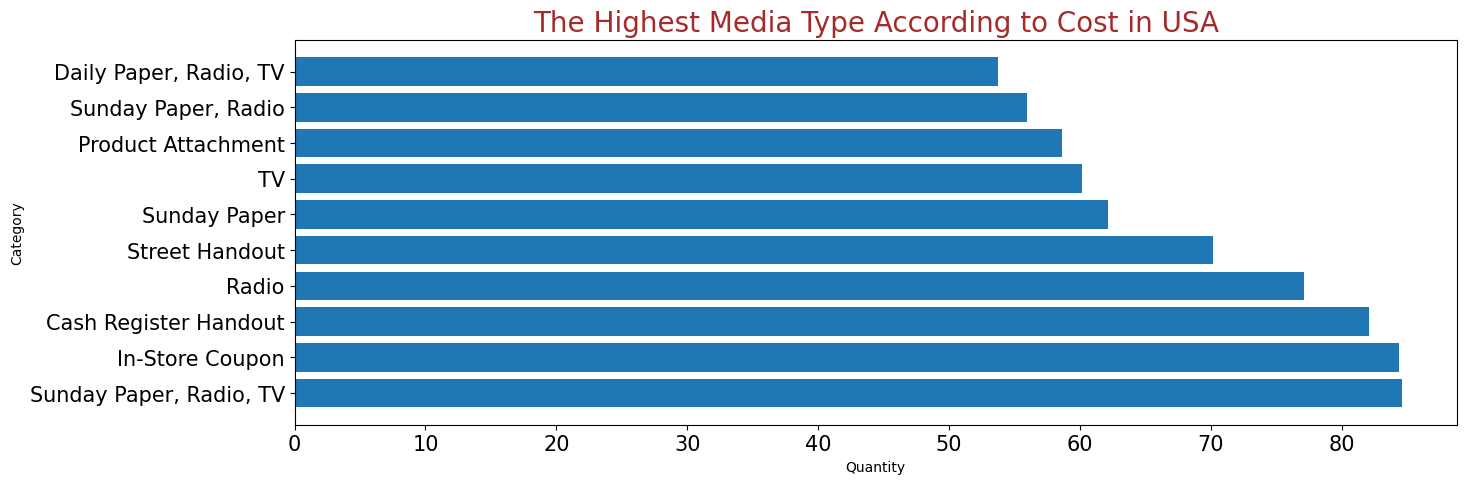

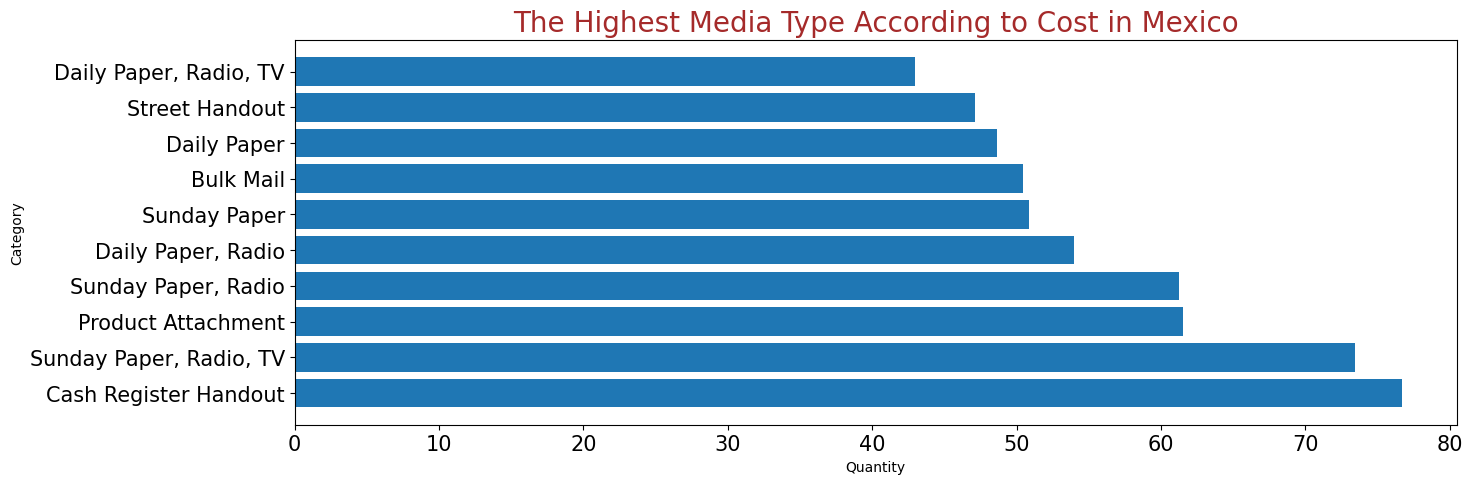

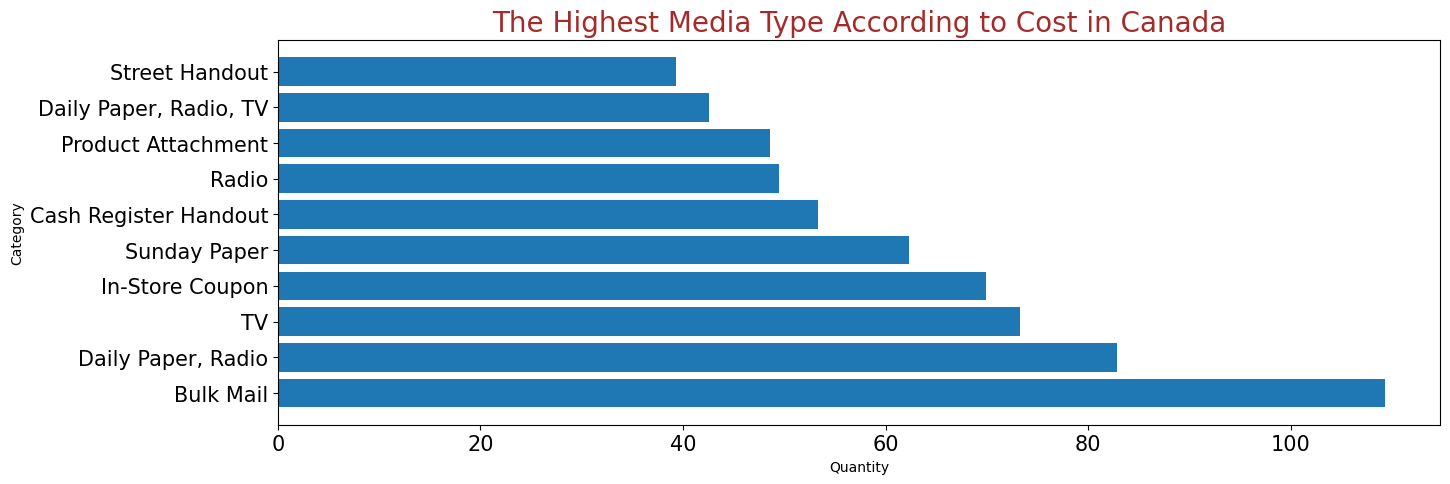

In [59]:
usa_store = data[data['sales_country'] == "USA"]
mexico_store = data[data['sales_country'] == "Mexico"]
canada_store = data[data['sales_country'] == "Canada"]

stores = ["USA", "Mexico", "Canada"]

for i, store in enumerate([usa_store, mexico_store, canada_store]):
    plt.figure(figsize=(15, 5))
    
    df_category_quantity = store.groupby('media_type')['cost'].mean().reset_index()
    df_category_quantity = df_category_quantity.sort_values(by='cost', ascending=False)

    plt.barh(df_category_quantity[:10]['media_type'], df_category_quantity[:10]['cost'])

    plt.yticks(range(len(df_category_quantity[:10]['media_type'])), df_category_quantity[:10]['media_type'], size=15)
    plt.xticks(size=15)
    plt.xlabel('Quantity')
    plt.ylabel('Category')
    plt.title(f'The Highest Media Type According to Cost in {stores[i]}', fontsize=20, color='brown')

plt.show()


### Store Distribution by City and State

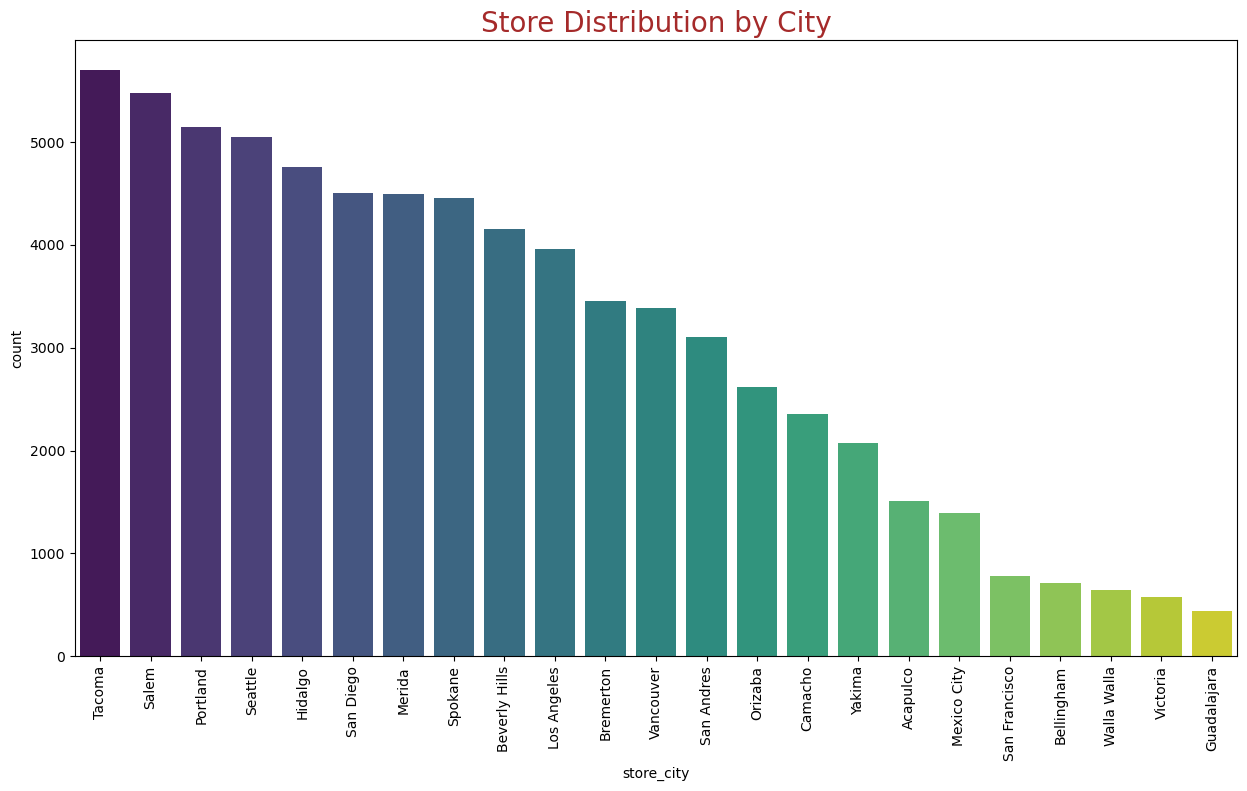

In [64]:
plt.figure(figsize=(15, 8))
sns.countplot(x='store_city', data=data, order=data['store_city'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Store Distribution by City', fontsize=20, color='brown')
plt.show()

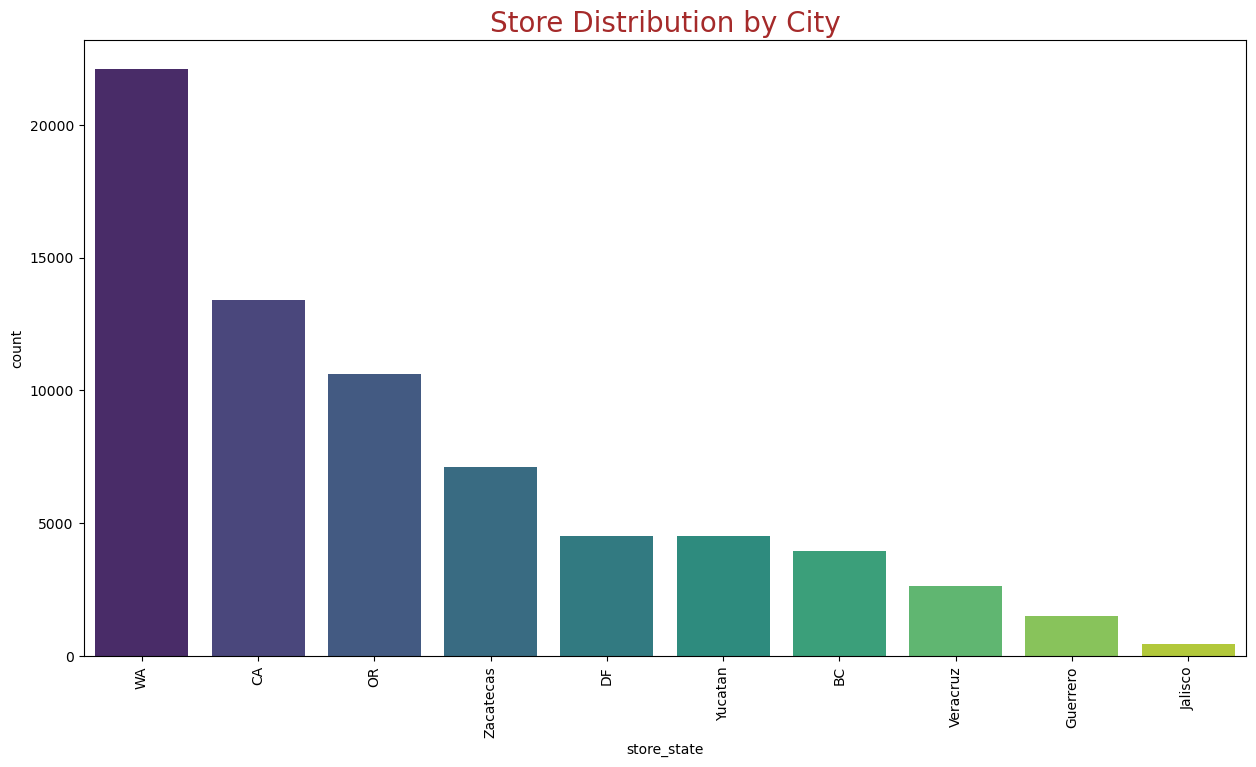

In [66]:
plt.figure(figsize=(15, 8))
sns.countplot(x='store_state', data=data, order=data['store_state'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Store Distribution by City', fontsize=20, color='brown')
plt.show()


### BoxPlot for Numerical Columns to check outliers.

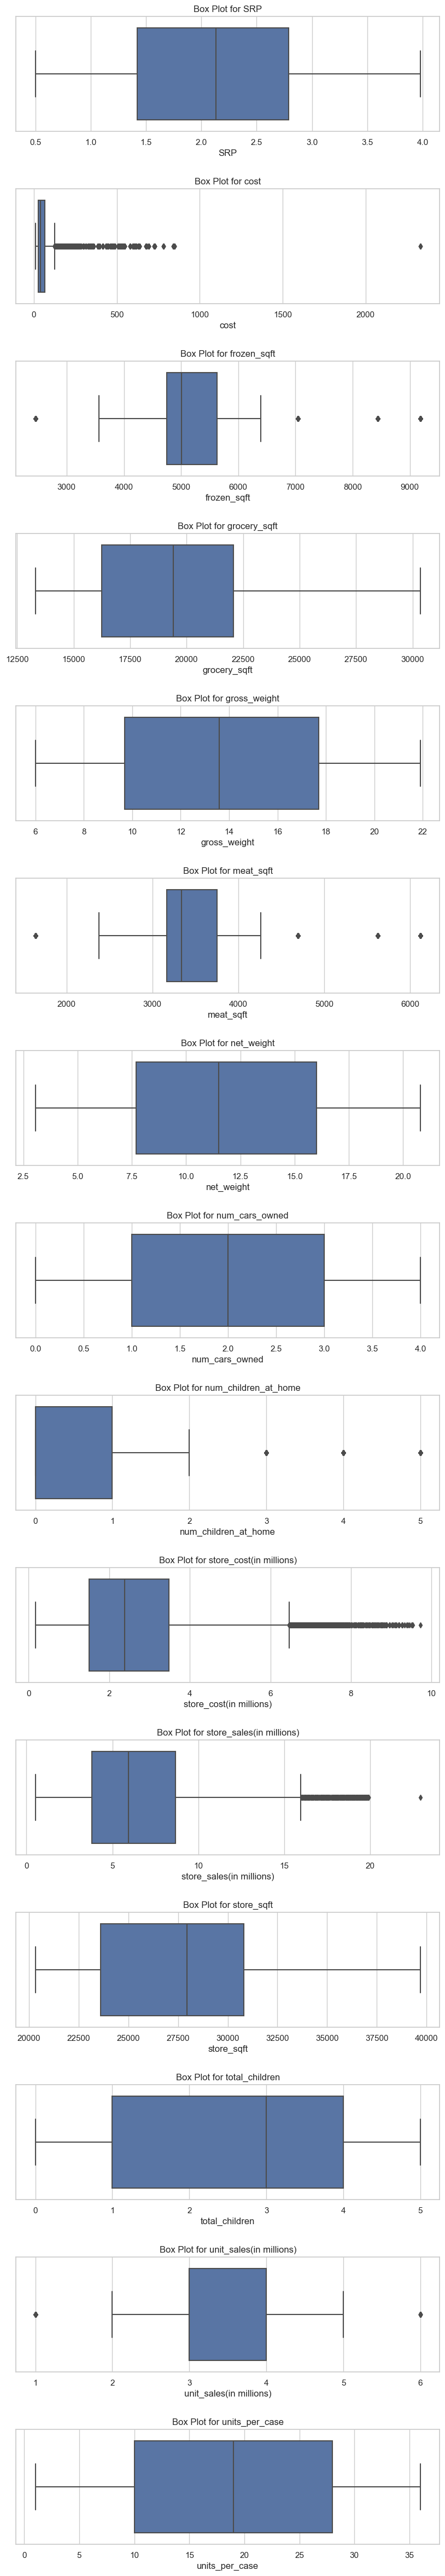

In [68]:
all_columns = data.columns
exclude_columns = ['recyclable_package', 'low_fat', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist']
numerical_features = data.select_dtypes(include=["number"]).columns.difference(exclude_columns).tolist()
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(10, 4 * len(numerical_features)))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(numerical_features):
    sns.boxplot(x=data[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot for {feature}')

plt.show()

### Correlation Matrix for Numerical Features

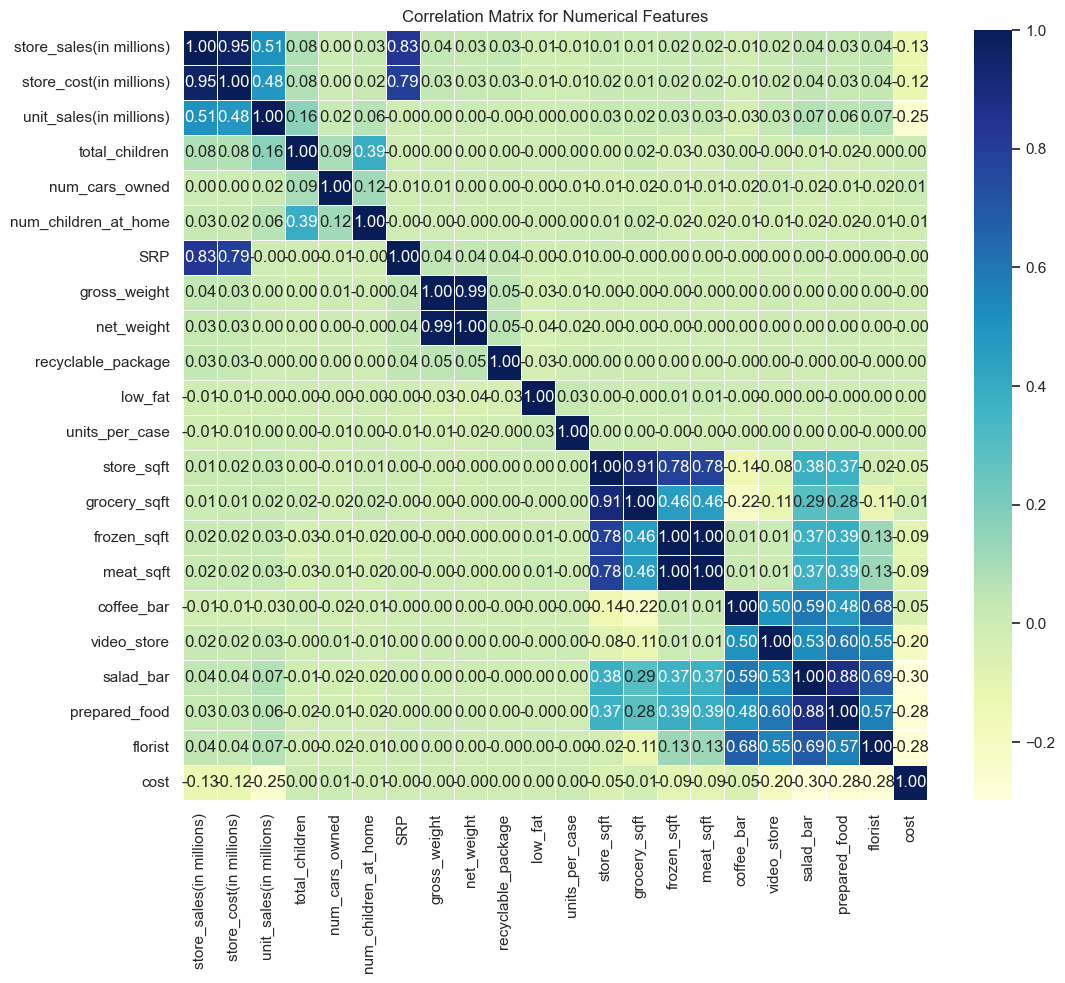

In [76]:
numerical_features = data.select_dtypes(include=["number"]).columns.tolist()
numerical_features = [col for col in numerical_features ]
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()